# Python surprise で作る らくらく「レコメンドエンジン」（その１） – さくっと Surprise でレコメンドエンジンを作ってみよう！ –

url: https://www.salesanalytics.co.jp/datascience/datascience180/

    協調フィルタリングやSVDなどの鉄板の「推薦システム（レコメンドエンジン）」であれば、PythonのSurpriseライブラリで簡単に作れます。
    このライブラリは推薦アルゴリズムの学習と予測を簡単に行うことができます。
    そのため、商品や映画などのアイテムをユーザーに対して推薦するシステムを構築する際に有用です。
    今回は、Surprise での「推薦システム（レコメンドエンジン）」の簡単な作り方について説明します。

# Surpriseライブラリー


##概要

    Surprise（Simple Python RecommendatIon System Engine）は、様々な種類の推薦システムアルゴリズムを実装するためのライブラリです。

url: https://surpriselib.com/

    Surpriseには、例えば以下のような機能があります。

    様々な推薦アルゴリズム：Collaborative filtering（協調フィルタリング）方法、Matrix Factorization-based（行列分解ベース）のアルゴリズム、などがあります。
    これらのアルゴリズムは、ユーザーの過去の行動や好みを基に、ユーザーがまだ評価していないアイテムを予測します。
    クロスバリデーション：データセットを分割してモデルの汎用性を評価するためのクロスバリデーションをサポートしています。
    チューニングパラメータ：Grid Searchなどの方法を用いてハイパーパラメータを最適化するためのツールも提供しています。
    
    要は、推薦システム（レコメンドエンジン）を作る道具が一通り揃っているということです

## インストール
    以下、condaでインストールするときです。
    conda install -c conda-forge scikit-surprise

    以下、pipでインストールするときです。
    pip install scikit-surprise


In [1]:
pip install scikit-surprise

## 利用できる推薦アルゴリズム例
以下、Surpriseで使用できるいくつかの主要な推奨アルゴリズムです。

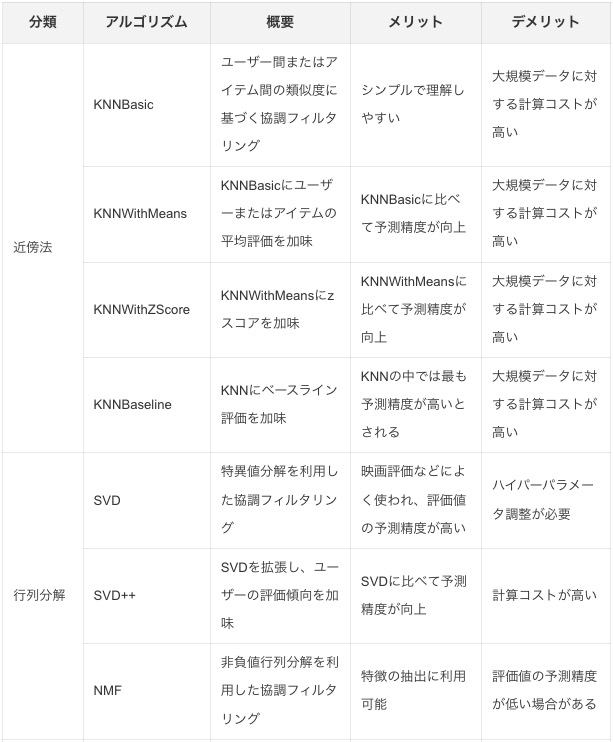

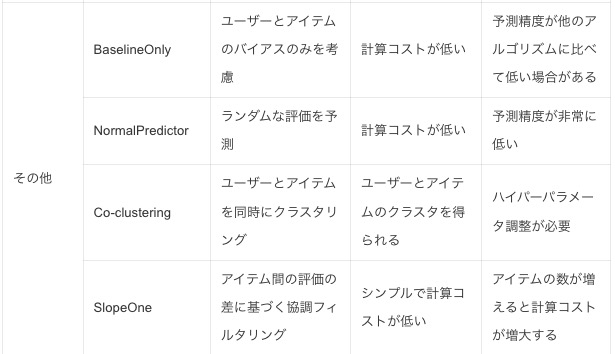

    それぞれのアルゴリズムが最適な状況は異なります。以下に、いくつかの主要なアルゴリズムとそれらが最適となる状況について説明します。

    近傍法 (k-Nearest Neighbors)：評価値の分布が一様でなく、ユーザーやアイテム間に明確な関連性が存在する場合に有効です。
    SVD (Singular Value Decomposition)：データセットが大きく、スパース性（欠損値が多い）が高い場合に適しています。
    NMF (Non-negative Matrix Factorization)：SVDと同様。元の評価行列の全ての要素が非負（0以上）。
    Slope One：スピーディーに妥当な精度の予測を行いたい場合に適しています。
    Co-clustering：データセットが明確なクラスタ構造を持っているときに有効です。

## 推薦システム（レコメンドエンジン）を作る
    流れ
    取り急ぎ、以下の手順で作って行きます。

1. 必要なモジュールの読み込み
2. データセットの読み込み（今回は、MovieLens）
3. データセットの分割 （学習データとテストデータ）
4. 推薦アルゴリズムの設定（今回は、SVD）
5. レコメンドエンジンの学習
6. レコメンドエンジンのテスト
7. レコメンドの実施




## 必要なモジュールの読み込み
    先ず、必要なモジュールを読み込みます。

    以下、コードです。

In [2]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

    from surprise import SVD: SVD（Singular Value Decomposition、特異値分解）という行列因子化手法を用いた推薦アルゴリズムをインポートしています。
    このアルゴリズムは、ユーザーとアイテムの間の相互作用（たとえば評価スコア）を予測するために使用されます。

    from surprise import Dataset: Surpriseライブラリで提供されているデータセットを操作するためのクラスをインポートしています。
    このクラスは、データセットの読み込みやユーザー-アイテム間の相互作用の管理などを行います。

    from surprise import accuracy: 推薦アルゴリズムの精度を計算するための関数（例えばRMSEやMAEなど）をインポートしています。
    
    from surprise.model_selection import train_test_split: データセットを学習セットとテストセットに分割するための関数をインポートしています。
    これは、アルゴリズムを学習データで訓練した後、テストデータでそのパフォーマンスを評価するために使用されます。

## データセットの読み込み

次に、MovieLens データセットをロードします。

以下、コードです。

In [3]:
data = Dataset.load_builtin("ml-100k")
display(data)

    MovieLens データセットとは、映画の評価データセットで、推薦システム（レコメンドエンジン）を構築するサンプルデータとして最も広く使用されています。

    具体的には、3つの変数からなります。
    user：ユーザーの識別子
    item：アイテム（今回は、映画）の識別子
    rating：評価値（今回は、1～5までの5段階評価）
    
    100,000件の評価（MovieLens 100K）、1,000,000件の評価（MovieLens 1M）、10,000,000件の評価（MovieLens 10M）の3つのバージョンがあります。

    今回は、100,000件の評価（MovieLens 100K）です。

## データセットの分割
    読み込んだデータセットを、学習データとテストデータに分割します。テストセットは全体の 20% を使用します。

    以下、コードです。

In [4]:
trainset, testset = train_test_split(data, test_size=.20)

In [5]:
display(trainset)
display(testset)

[('524', '72', 4.0),
 ('537', '741', 2.0),
 ('286', '1286', 5.0),
 ('269', '1073', 3.0),
 ('912', '194', 4.0),
 ('846', '1004', 3.0),
 ('433', '474', 3.0),
 ('185', '216', 4.0),
 ('328', '23', 3.0),
 ('299', '481', 3.0),
 ('38', '82', 5.0),
 ('30', '301', 4.0),
 ('874', '676', 3.0),
 ('655', '216', 4.0),
 ('198', '462', 3.0),
 ('455', '170', 3.0),
 ('69', '475', 3.0),
 ('82', '1101', 4.0),
 ('887', '1029', 5.0),
 ('863', '1022', 2.0),
 ('564', '281', 3.0),
 ('149', '305', 4.0),
 ('393', '845', 4.0),
 ('300', '456', 4.0),
 ('13', '243', 3.0),
 ('939', '1190', 5.0),
 ('515', '329', 2.0),
 ('493', '134', 3.0),
 ('526', '50', 5.0),
 ('561', '423', 2.0),
 ('305', '151', 4.0),
 ('852', '1', 4.0),
 ('796', '467', 3.0),
 ('313', '218', 2.0),
 ('38', '717', 1.0),
 ('536', '97', 3.0),
 ('329', '855', 4.0),
 ('239', '340', 5.0),
 ('487', '173', 4.0),
 ('730', '151', 4.0),
 ('676', '64', 5.0),
 ('845', '311', 4.0),
 ('747', '555', 2.0),
 ('871', '575', 5.0),
 ('315', '164', 4.0),
 ('232', '8', 2.0

    train_test_split関数は、指定した比率でデータを学習データとテストデータに分割します。

    この場合、train_test_split(data, test_size=.20)は、入力されたデータdataを学習データとテストデータに分割しています。
    ここで、test_size=.20はテストデータの割合を全データの20%に設定しています。その結果、全データの80%が学習データ、残りの20%がテストデータとして利用されます。

    戻り値としては、分割後の学習データ(trainset)とテストデータ(testset)が得られます。
    学習データはモデルの学習に、テストデータは学習したモデルの性能評価（一般化性能のチェック）に使用されます。

## 推薦アルゴリズムの設定
    推薦アルゴリズムのインスタンスを作ります。

    以下、コードです。

In [6]:
algo = SVD()

    SVD（Singular Value Decomposition、特異値分解）アルゴリズムをインスタンス化しています。

    algo = SVD()とすることで、algoという変数にSVDアルゴリズムの新しいインスタンスが作られます。
    デフォルトのパラメータでインスタンス化されますが、必要に応じて引数を指定してパラメータを調整することも可能です。

## レコメンドエンジンの学習
    レコメンドエンジンを学習します。

    以下、コードです。

In [7]:
algo.fit(trainset)

    algo（ここでは、それはSVDという推薦アルゴリズムのインスタンス）に、fitメソッドを使用して学習データセットtrainsetを用いて学習しています。

## レコメンドエンジンのテスト
    レコメンドエンジンをテストします。RMSE（Root Mean Square Error）とMAE（Mean Absolute Error）を使ってモデルの精度を評価しています。

    RMSE：予測誤差（実際の評価と予測評価の差）の二乗平均の平方根を取った値
    MAE：予測誤差の絶対値の平均を取った値
    以下、コードです。

In [8]:
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

# 5段階評価で、予測と実測の乖離が1未満ということが分かります。悪くはありません。

RMSE: 0.9334
MAE:  0.7371


0.7371417029764307

    学習済みの推薦モデル（ここではalgoという名前のSVDアルゴリズムのインスタンス）を用いてテストデータセットtestsetに対する予測を行い、その結果を評価しています。

    predictions = algo.test(testset): ここでtestメソッドを呼び出すことで、テストデータセットtestsetに含まれる各ユーザーとアイテムのペアに対する評価値（レーティング）の予測を行います。
    この予測結果はpredictionsという変数に格納されます。
    
    accuracy.rmse(predictions): accuracy.rmseはSurpriseライブラリの評価関数で、予測結果predictionsのRoot Mean Square Error (RMSE、平均二乗誤差の平方根) を計算します。
    RMSEはモデルの予測エラーを評価する指標で、値が小さいほど予測精度が高いとされます。
    
    accuracy.mae(predictions): accuracy.maeもSurpriseライブラリの評価関数で、予測結果predictionsのMean Absolute Error (MAE、平均絶対誤差) を計算します。
    MAEもモデルの予測エラーを評価する指標で、値が小さいほど予測精度が高いとされます。

## レコメンドの実施
    全ユーザに対しレコメンドを実施します。

    先ず、レコメンド構築用のデータセットと、レコメンド用のデータセットを作ります。

    以下、コードです。

In [9]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

In [10]:
display(trainset)
display(testset)

[('196', '302', 3.52986),
 ('196', '377', 3.52986),
 ('196', '51', 3.52986),
 ('196', '346', 3.52986),
 ('196', '474', 3.52986),
 ('196', '265', 3.52986),
 ('196', '465', 3.52986),
 ('196', '451', 3.52986),
 ('196', '86', 3.52986),
 ('196', '1014', 3.52986),
 ('196', '222', 3.52986),
 ('196', '40', 3.52986),
 ('196', '29', 3.52986),
 ('196', '785', 3.52986),
 ('196', '387', 3.52986),
 ('196', '274', 3.52986),
 ('196', '1042', 3.52986),
 ('196', '1184', 3.52986),
 ('196', '392', 3.52986),
 ('196', '486', 3.52986),
 ('196', '144', 3.52986),
 ('196', '118', 3.52986),
 ('196', '1', 3.52986),
 ('196', '546', 3.52986),
 ('196', '95', 3.52986),
 ('196', '768', 3.52986),
 ('196', '277', 3.52986),
 ('196', '234', 3.52986),
 ('196', '246', 3.52986),
 ('196', '98', 3.52986),
 ('196', '193', 3.52986),
 ('196', '88', 3.52986),
 ('196', '194', 3.52986),
 ('196', '1081', 3.52986),
 ('196', '603', 3.52986),
 ('196', '796', 3.52986),
 ('196', '32', 3.52986),
 ('196', '16', 3.52986),
 ('196', '304', 3.5

    data.build_full_trainset(): このメソッドは全てのデータからレコメンド構築用のデータセットを構築します。
    ユーザーとアイテムの評価データ全体を含みます。これを使用することで、全てのデータを使ってモデルを学習できます。

    trainset.build_anti_testset(): このメソッドはユーザーとアイテムの評価がまだされていない組み合わせからなるデータセットを構築します。
    つまり、ユーザーがまだ評価していないアイテムに対する予測を作成するためのデータセットです。
    評価値が不明なアイテムに対して、レコメンドエンジンがどのような評価を予測するために使用されます。

    これらの2つのメソッドを組み合わせることで、全てのデータを用いてレコメンドエンジンを学習し（data.build_full_trainset()）、
    そのレコメンドエンジンを使用してまだ評価されていないアイテムに対する評価を予測する（trainset.build_anti_testset()）ことができます。
    この結果を基にユーザーに対する新たなレコメンデーションを生成することが可能になります。

    レコメンドエンジンを学習します。

    以下、コードです。

In [11]:
algo.fit(trainset)

    では、各ユーザーに対して映画のレコメンドを行います。

    各ユーザの評価を予測します。

    以下、コードです。

In [12]:
predictions = algo.test(testset)

In [13]:
display(predictions)

[Prediction(uid='196', iid='302', r_ui=3.52986, est=4.133363510608952, details={'was_impossible': False}),
 Prediction(uid='196', iid='377', r_ui=3.52986, est=2.7260995171591307, details={'was_impossible': False}),
 Prediction(uid='196', iid='51', r_ui=3.52986, est=3.455135960995379, details={'was_impossible': False}),
 Prediction(uid='196', iid='346', r_ui=3.52986, est=3.5607575736588086, details={'was_impossible': False}),
 Prediction(uid='196', iid='474', r_ui=3.52986, est=4.226970320601833, details={'was_impossible': False}),
 Prediction(uid='196', iid='265', r_ui=3.52986, est=3.7170820439571988, details={'was_impossible': False}),
 Prediction(uid='196', iid='465', r_ui=3.52986, est=3.526521585381304, details={'was_impossible': False}),
 Prediction(uid='196', iid='451', r_ui=3.52986, est=3.3679745092752036, details={'was_impossible': False}),
 Prediction(uid='196', iid='86', r_ui=3.52986, est=3.7384295688230975, details={'was_impossible': False}),
 Prediction(uid='196', iid='1014',

    上位nまで抜き出し、取り扱いやすいように辞書形式で格納します。

    以下、コードです。

In [14]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=10)

In [15]:
top_n

defaultdict(list,
            {'196': [('318', 4.749795382721388),
              ('174', 4.58753074067562),
              ('50', 4.552021687309122),
              ('169', 4.549096559918694),
              ('313', 4.516885156953706),
              ('64', 4.481775352894102),
              ('190', 4.444142435207686),
              ('511', 4.404907616897483),
              ('12', 4.401799499833847),
              ('483', 4.376373117889391)],
             '186': [('318', 4.745792010790527),
              ('498', 4.684282192339259),
              ('132', 4.673737886256287),
              ('427', 4.657451671453494),
              ('64', 4.631624777098985),
              ('603', 4.55731372164175),
              ('483', 4.556802012134977),
              ('190', 4.553592137999947),
              ('357', 4.519732342264362),
              ('178', 4.491155107821876)],
             '22': [('98', 4.781527684694132),
              ('408', 4.613888519978466),
              ('318', 4.589758712990023),
 

    各ユーザーに対する上位n個のアイテムを予測評価値の高い順に抽出し、ユーザーごとにリストとしてtop_nに格納しました。
    このtop_nは、ユーザーIDをキーとし、その値がユーザーにレコメンドされるアイテムのIDと予測評価のリストである辞書です。
    これで完成です。

    ただ、辞書ではなくデータフレームに変換したいな、と思う方もいるかと思います。
    以下で、辞書からデータフレームに変換します。

In [16]:
import pandas as pd

def get_top_n_df(top_n):
    top_n_df = []
    for uid, user_ratings in top_n.items():
        for iid, est in user_ratings:
            top_n_df.append([uid, iid, est])
    return pd.DataFrame(top_n_df, columns=['User', 'Item', 'Estimate'])

top_n_df = get_top_n_df(top_n)

display(top_n_df) #確認

,User,Item,Estimate
0,196,318,4.749795
1,196,174,4.587531
2,196,50,4.552022
3,196,169,4.549097
4,196,313,4.516885
...,...,...,...
9425,941,187,4.806321
9426,941,127,4.797730
9427,941,474,4.797072
9428,941,603,4.788494


    ちなみに、特定のユーザとアイテム（映画）を指定し、評価の予測するときには、以下のようにします。

In [17]:
uid = str(597)   # ユーザ
iid = str(1152)  # アイテム（映画）

pred = algo.predict(uid, iid, verbose=True)

user: 597        item: 1152       r_ui = None   est = 3.74   {'was_impossible': False}


    user: 597 : ユーザーIDが597
    item: 1152 : アイテムIDが1152
    r_ui = None : 実際の評価値（ユーザーがアイテムに付けた評価）です。引数で設定していないのでNone
    est = 3.57 : 推定値（予測された評価値）。つまり、アルゴリズムはユーザー597がアイテム1152に対して3.57の評価をすると予測
    {'was_impossible': False} : 予測が不可能だったかどうかを示すフラグ。ここではFalseなので、予測が可能だった

## まとめ

    今回は、Surprise での「推薦システム（レコメンドエンジン）」の簡単な作り方について説明しました。
    他にも色々なアルゴリズムがあります。興味のある方は、試してみてください。
    アルゴリズムの中にはハイパーパラメータのあるものもあります。
    今回はデフォルトのまま構築しましたが、SVDなどのハイパーパラメータのある推薦アルゴリズムは、適切なチューニングをすることで、レコメンド精度が向上します。
    次回は、ハイパーパラメータチューニングを簡単に実施する方法（グリッドサーチ×CV）について説明します。